<Body>   
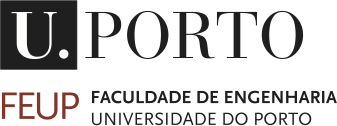   
<h1> <b>Computer Vision </b> </h1>
</Body>  

<br>**Master in Data Science & Engineering**     <br><br> **Diogo Cruz - Vitor Pereira**  <br>
<br> Faculty of Engineering, University of Porto <br>FEUP Nov. 2023

# **Assigment 1**

<h2>Table of contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#ref1">Intrinsic Parameters</a></li>
    <li><a href="#ref2">Extrinsic Parameters</a></li>
    <li><a href="#ref3">White Background Images</a></li>
      <ol type="I">
            <li><a href="#ref3-1">Region of Interest (ROI)</a></li>
            <li><a href="#ref3-2">Number of M&M's per color</a></li>
            <li><a href="#ref3-3">Average peanuts' area (px)</a></li>
            <li><a href="#ref3-4">Average peanuts' area and Standard deviation by color (mm)</a></li>
            <li><a href="#ref3-5">Recommendations</a></li>
      </ol>
      <li><a href="#ref4">Grey Background Images</a></li>
            <ol type="I">
            <li><a href="#ref4-1">Number of M&M's per color</a></li>
            <li><a href="#ref4-2">Average peanuts' area (px)</a></li>
            <li><a href="#ref4-3">Average peanuts' area and Standard deviation by color (mm)</a></li>
            <li><a href="#ref4-4">Recommendations</a></li>
      </ol>
</ol>
<p></p>
</div>
<hr>


In [5]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob
from PIL import Image


In [6]:
from google.colab import files
uploaded = files.upload()

<a id="ref1"></a>
# **a)** Calibrate the intrinsic parameters and lens distortion of the camera. Show the intrinsic matrix and the lens distortion coefficients.

In [7]:
def int_calibration(height,width, criteria, imgs):
    objp = np.zeros((height*width,3), np.float32)
    objp[:,:2] = np.mgrid[0:width,0:height].T.reshape(-1,2)
    objpoints = [] # 3d point in real world space
    imgpoints = [] # 2d points in image plane.
    images = glob.glob(imgs)
    for fname in images:
        img = cv.imread(fname)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        # Find the chess board corners
        is_correct, corners = cv.findChessboardCorners(gray, (width,height), None)
        # If found, add object points, image points (after refining them)
        if is_correct == True:
            objpoints.append(objp)
            corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
            imgpoints.append(corners2)
    return objpoints, imgpoints, gray

In [8]:
objpoints, img_points, gray = int_calibration(height=7, width=4,
                                                imgs='IntrinsicCalibration/*.png',
                                                criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001))

In [9]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, img_points, gray.shape[::-1], None, None)

In [10]:
np.set_printoptions(suppress=True)
print('='*50)
print('\t\tIntrinsic Matrix')
print('='*50)
print(np.round(mtx,2))
print('='*50)
print('\t\t  Focal Length')
print('='*50)
print(f'fx= {round(mtx[0,0],2)}')
print(f'fy= {round(mtx[1,1],2)}')
print('='*50)
print('\t\t Optical Centers')
print('='*50)
print(f'cx= {round(mtx[0,2],2)}')
print(f'cy= {round(mtx[1,2],2)}')
print('='*50)
print('\t    Lens Distortion Coefficients')
print('='*50)
print(f'k1= {round(dist[0][0],2)}')
print(f'k2= {round(dist[0][1],2)}')
print(f'p1= {round(dist[0][2],2)}')
print(f'p2= {round(dist[0][3],2)}')
print(f'k3= {round(dist[0][4],2)}')



		Intrinsic Matrix
[[1321.65    0.    988.3 ]
 [   0.   1324.45  642.26]
 [   0.      0.      1.  ]]
		  Focal Length
fx= 1321.65
fy= 1324.45
		 Optical Centers
cx= 988.3
cy= 642.26
	    Lens Distortion Coefficients
k1= -0.34
k2= 0.09
p1= 0.0
p2= -0.0
k3= -0.0


<a id="ref2"></a>
# **b)** Calibrate the extrinsic parameters of the camera setup (or instead, use the extrinsic image to manually measure the dimensions of a black square of the chessboard in pixels. In this way, you will know the conversion between pixel to millimeter). Show the extrinsic matrix (rotation, translation, etc) and/or the conversion ratio between pixel to millimeter that was used

In [11]:
def ext_calibration(height,width, criteria, img):
    objp = np.zeros((height*width,3), np.float32)
    objp[:,:2] = np.mgrid[0:height,0:width].T.reshape(-1,2)
    img_ext = cv.imread(img)
    gray_ext = cv.cvtColor(img_ext, cv.COLOR_BGR2GRAY)
    is_correct, corners_ext = cv.findChessboardCorners(gray_ext, (width,height), None)
    if is_correct == True:
        corners_ext_2 = cv.cornerSubPix(gray_ext,corners_ext,(11,11),(-1,-1),criteria)

        # Function to return the translation and rotation vectors
        retval, rvec, tvec = cv.solvePnP(objp,corners_ext_2,mtx,dist)

    return rvec, tvec, gray_ext


In [12]:
rvec, tvec, gray_ext = ext_calibration(height=7, width=4,
                                                img='WhiteBackground/extrinsic.png',
                                                criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001))

In [13]:
np.set_printoptions(suppress=True)
print('='*50)
print('\t\tRotation Vector')
print('='*50)
print(np.round(rvec, 3))
print('='*50)
print('\t\tTranslation Vector')
print('='*50)
print(np.round(tvec,3))
print('='*50)

		Rotation Vector
[[-2.18 ]
 [ 2.702]
 [-2.131]]
		Translation Vector
[[ 2.097]
 [-0.874]
 [ 4.912]]


In [14]:
np.set_printoptions(suppress=True)
# Converts rotation vector to rotation matrix
R, _  = cv.Rodrigues(rvec)
print('='*50)
print('\t\tRotation Matrix')
print('='*50)
print(np.round(R,3))
extrinsic_matrix = np.hstack((R, tvec))
print('='*50)
print('\t\tExtrinsic Matrix')
print('='*50)
print(np.round(extrinsic_matrix,3))

		Rotation Matrix
[[-0.139 -0.987 -0.086]
 [-0.147  0.106 -0.983]
 [ 0.979 -0.124 -0.16 ]]
		Extrinsic Matrix
[[-0.139 -0.987 -0.086  2.097]
 [-0.147  0.106 -0.983 -0.874]
 [ 0.979 -0.124 -0.16   4.912]]


In [15]:
width = 4
height = 7
distance = 0
count = 0

# Function for undistortion image using the parameters obtained above
def undistortion(img, mtx, dist):
  h,  w = img.shape[:2]
  newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

  # Undistort
  mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
  dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
  # Crop the image
  x, y, w, h = roi
  dst = dst[y:y+h, x:x+w]

  return dst, newcameramtx

def compute_mm(img, width, height, distance, count, gray, mtx, dist):
  # Load the image of chessbord
  img = cv.imread(img)

  # Convert to grayscale
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  # Undistorted gray chessboard
  chess_undistortion, newcameramtx = undistortion(gray, mtx, dist)

  # Find the corners of the chessboard
  _, corners = cv.findChessboardCorners(chess_undistortion, (width, height))


  # The points in corners are inseted from top to bottom and left to right
  # Also, we need to ignore the calculation of the distance between one pixel and another that does not represent the side of the square.
  # This occurs when (i + 1) is divisible by the number of rows, i.e, when it isn't in the same column
  for i in range(0, len(corners) -1):
      if((i + 1) % width == 0):
        continue
      # Compute the distance between the first two corners
      p1 = corners[i][0]
      p2 = corners[i + 1][0]
      distance += np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
      count +=1

  square_pixels = distance/count

  square_size = 21
  conversionFactor = (square_pixels)/square_size
  print(f"Each millimeter has {conversionFactor:.4f} pixels.")
  mm = square_size/square_pixels
  print(f"Each pixel has {mm:.4f} millimeters.")
  return mm, newcameramtx


In [16]:
mm_ratio, newcameramtx = compute_mm(img='WhiteBackground/extrinsic.png', width=4, height=7, distance=distance, count=count,
           gray=gray, mtx=mtx, dist=dist)

Each millimeter has 3.8506 pixels.
Each pixel has 0.2597 millimeters.


<a id="ref3"></a>
# c) Consider only the images retrieved from a White Background

In [17]:
def get_colors(b,g,r):
    color = np.uint8([[[b, g, r]]])
    hsv_color = cv.cvtColor(color, cv.COLOR_BGR2HSV)
    print(hsv_color)

    lowerLimit = hsv_color[0][0][0] - 10, 100, 100
    upperLimit = hsv_color[0][0][0] + 10, 255, 255

    print(lowerLimit)
    print(upperLimit)

In [18]:
get_colors(19,69,139)

[[[ 13 220 139]]]
(3, 100, 100)
(23, 255, 255)


<a id="ref3-1"></a>
## I - Define a ROI (region of interest) for the image

In [19]:
def get_roi(img_path):
    # read image
    img = cv.imread(img_path)
    h, w = img.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
    # undistort
    undst_img = cv.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    undst_img_roi = undst_img[y:y+h, x:x+w]
    img_rgb = cv.cvtColor(undst_img_roi, cv.COLOR_BGR2RGB)
    img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

    lower_white = np.array([0, 0, 165])
    upper_white = np.array([179, 85, 255])

    white = cv.inRange(img_hsv, lower_white, upper_white)
    result = cv.bitwise_and(img_rgb, img_rgb, mask=white)
    result = cv.medianBlur(result, 7)

    return result


def plot(img, pos, title: str):
    plt.subplot(pos)
    plt.imshow(img)
    plt.title(title)

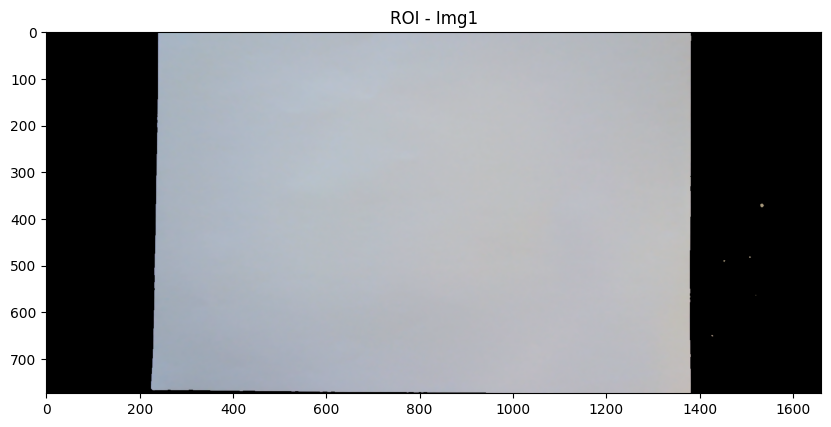

In [20]:
result = get_roi(img_path='WhiteBackground/calib_img 0.png')
#result = np.nonzero(result)
#y = result[0].max()
#h = result[0].min()
#x = result[1].min()
#w = result[1].max()

# Plot images
plt.figure(figsize=(10,15))
plot(result, 111, 'ROI - Img1')

In [21]:
def roi(img_path):
    # read image
    img = cv.imread(img_path)
    h, w = img.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
    # undistort
    undst_img = cv.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    undst_img_roi = undst_img[y:y+h, x:x+w]
    img_rgb = cv.cvtColor(undst_img_roi, cv.COLOR_BGR2RGB)
    img_rgb = img_rgb[0:2500, 0+300:1300]

    return undst_img_roi, img_rgb

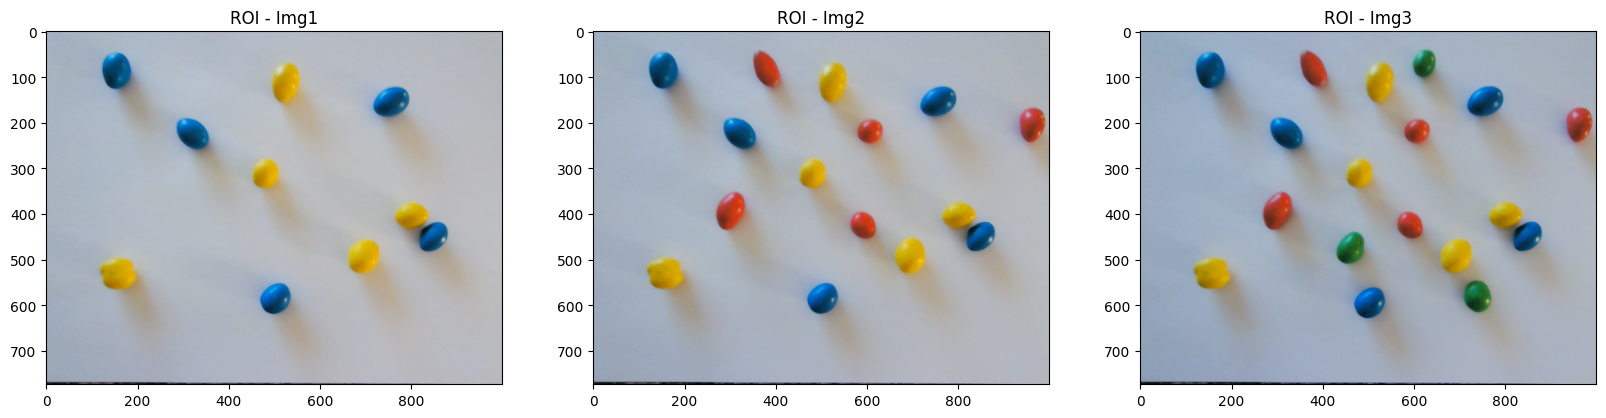

In [22]:
# Get region of interest and convert image to RGB
img0_roi, img0_rgb = roi(img_path='WhiteBackground/calib_img 0.png')
img1_roi, img1_rgb = roi(img_path='WhiteBackground/calib_img 1.png')
img2_roi, img2_rgb = roi(img_path='WhiteBackground/calib_img 2.png')
img3_roi, img3_rgb = roi(img_path='WhiteBackground/calib_img 3.png')

# Plot images
plt.figure(figsize=(20,30))
plot(img1_rgb, 131, 'ROI - Img1')
plot(img2_rgb, 132, 'ROI - Img2')
plot(img3_rgb, 133, 'ROI - Img3')
plt.show()

<a id="ref3-2"></a>
## II - Calculate the number of M&M per color for all images provided

In [23]:
colors_dict = {
    'lower_blue':np.array([90, 90, 2]),
    'upper_blue':np.array([126,255,255]),

    'lower_green':np.array([30, 50, 40]),
    'upper_green':np.array([91,255,255]),

    'lower_yellow':np.array([20, 100, 100]),
    'upper_yellow':np.array([30, 255, 255]),

    'lower_red_1':np.array([0,50,20]),
    'upper_red_1':np.array([9,255,255]),

    'lower_red_2':np.array([130,35,20]),
    'upper_red_2':np.array([179, 255, 255])
}

In [24]:
# function to detect all the colors
def colors(img):
    imgHSV = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    yellow = cv.inRange(imgHSV, colors_dict['lower_yellow'], colors_dict['upper_yellow'])
    blue = cv.inRange(imgHSV, colors_dict['lower_blue'], colors_dict['upper_blue'])
    green = cv.inRange(imgHSV, colors_dict['lower_green'], colors_dict['upper_green'])
    red1 = cv.inRange(imgHSV, colors_dict['lower_red_1'], colors_dict['upper_red_1'])
    red2 = cv.inRange(imgHSV, colors_dict['lower_red_2'], colors_dict['upper_red_2'])
    mask = yellow + blue + green + red1 + red2
    result = cv.bitwise_and(img, img, mask=mask)
    return result

# function to segment each color
def count_colors(img, color):
    imgHSV = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    # create a mask if mm is yellow
    if color == 'yellow':
        color = cv.inRange(imgHSV, colors_dict['lower_yellow'], colors_dict['upper_yellow'])
    # create a mask if mm is blue
    elif color == 'blue':
        color = cv.inRange(imgHSV, colors_dict['lower_blue'], colors_dict['upper_blue'])
    # create a mask if mm is green
    elif color == 'green':
        color = cv.inRange(imgHSV, colors_dict['lower_green'], colors_dict['upper_green'])
    # create a mask if mm is red
    elif color == 'red':
        color1 = cv.inRange(imgHSV, colors_dict['lower_red_1'], colors_dict['upper_red_1'])
        color2 = cv.inRange(imgHSV, colors_dict['lower_red_2'], colors_dict['upper_red_2'])
        color = color1 + color2

    result = cv.bitwise_and(img, img, mask=color)
    return result

# get each color contour
def contours(img):
    # convert to gray scale
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # median filter
    #median = cv.medianBlur(img_gray, 7)
    kernel = np.ones((11,11), 'uint8')
    # opening and closing operations
    closed = cv.morphologyEx(img_gray, cv.MORPH_CLOSE, kernel)
    opened = cv.morphologyEx(closed, cv.MORPH_OPEN, kernel)
    # convert to binary
    ret, thresh = cv.threshold(opened, thresh = 0, maxval = 255, type = 0)
    # find the contours
    contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    return contours

# sum contours and print results
def colors_num(img, img_name):
    # segmentation by color
    yellow = count_colors(img, 'yellow')
    green = count_colors(img, 'green')
    blue = count_colors(img, 'blue')
    red = count_colors(img, 'red')
    # print the results for each color
    # yellow
    print('='*30)
    print(f'\t{img_name}')
    print('='*30)
    if len(contours(yellow)) == 0:
        print('\nThere are not yellow peanuts')
    else:
        print(f'\nThere are {len(contours(yellow))} yellow peanuts')
    # green
    if len(contours(green)) == 0:
        print('There are not green peanuts')
    else:
        print(f'There are {len(contours(green))} green peanuts')
    # blue
    if len(contours(blue)) == 0:
        print('There are not blue peanuts')
    else:
        print(f'There are {len(contours(blue))} blue peanuts')
    # red
    if len(contours(red)) == 0:
        print('There are not red peanuts\n')
    else:
        print(f'There are {len(contours(red))} red peanuts\n')

    return yellow, green, blue, red


	Image 1

There are 5 yellow peanuts
There are not green peanuts
There are 5 blue peanuts
There are not red peanuts

	Image 2

There are 5 yellow peanuts
There are not green peanuts
There are 5 blue peanuts
There are 5 red peanuts

	Image 3

There are 5 yellow peanuts
There are 3 green peanuts
There are 5 blue peanuts
There are 5 red peanuts



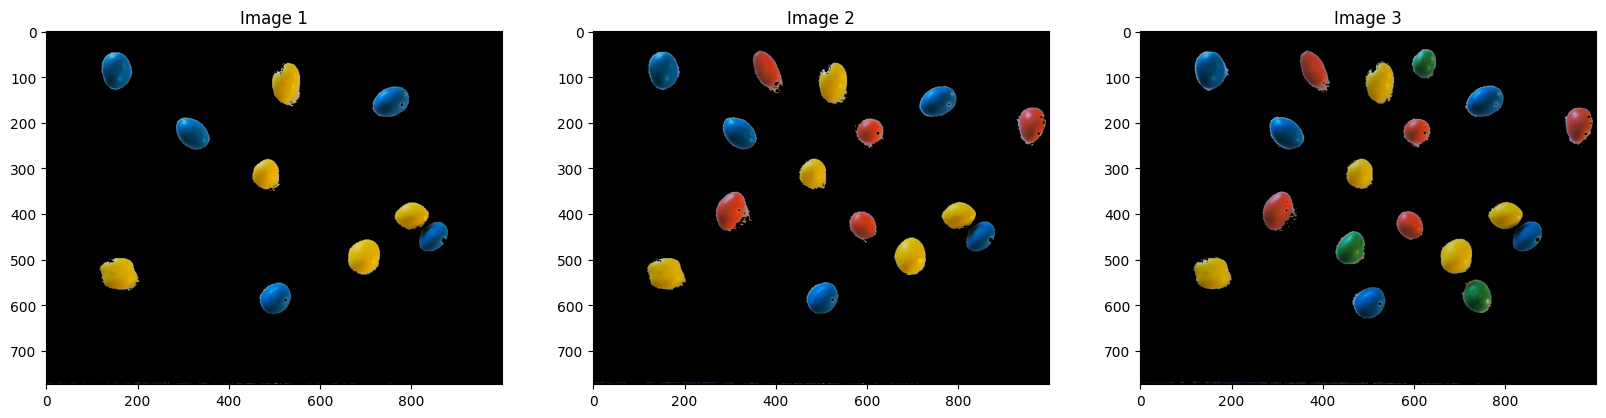

In [25]:
yellow1, green1, blue1, red1 = colors_num(img1_rgb, 'Image 1')
yellow2, green2, blue2, red2 = colors_num(img2_rgb, 'Image 2')
yellow3, green3, blue3, red3 = colors_num(img3_rgb, 'Image 3')

plt.figure(figsize=(20,30))
result1 = colors(img1_rgb)
result2 = colors(img2_rgb)
result3 = colors(img3_rgb)
plot(result1, 131, 'Image 1')
plot(result2, 132, 'Image 2')
plot(result3, 133, 'Image 3')

<a id="ref3-3"></a>
## III - Determine the average area for peanuts in pixels, considering the image “calib_img 3”

### i - Show all peanuts that were detected.

In [26]:
def compute_area(img, img_num: int, *args):
    area = []
    for i in args:
        cnt = contours(i)
        for j in cnt:
            c_moment = cv.moments(j)
            area.append(c_moment['m00'])
            cv.drawContours(img, cnt, -1, (0, 255, 0), 2)
    print(f"The average M&M's area of image {img_num}, in pixels, is: {round(np.mean(area),2)}")
    return area

The average M&M's area of image 1, in pixels, is: 3725.95
The average M&M's area of image 2, in pixels, is: 3649.27
The average M&M's area of image 3, in pixels, is: 3559.53


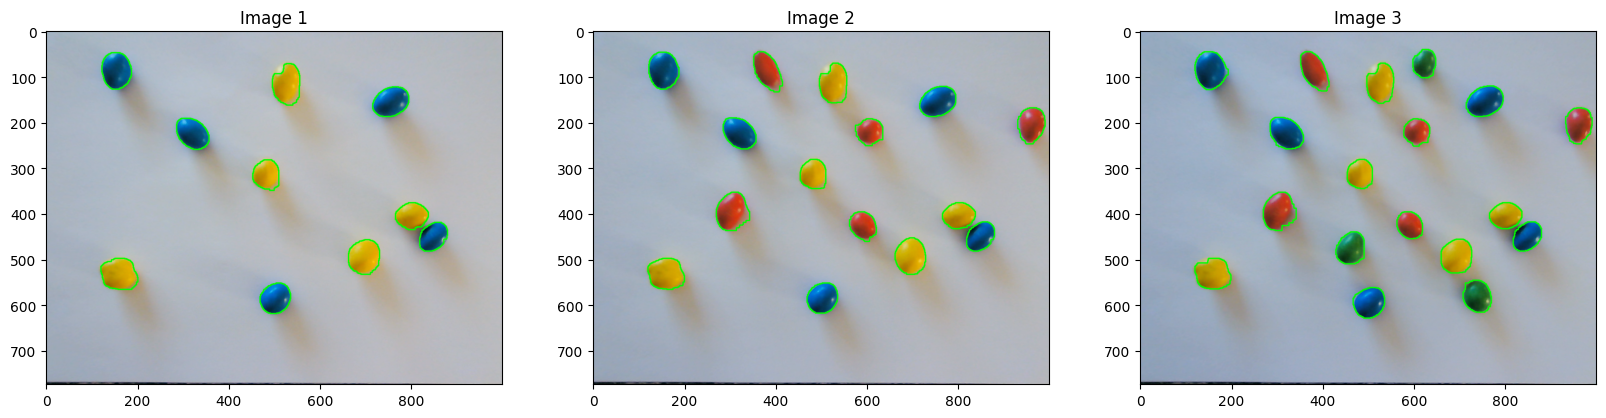

In [27]:
area1 = compute_area(img1_rgb, 1, yellow1, green1, blue1, red1)
area2 = compute_area(img2_rgb, 2, yellow2, green2, blue2, red2)
area3 = compute_area(img3_rgb, 3, yellow3, green3, blue3, red3)
plt.figure(figsize=(20,30))
plot(img1_rgb, 131, 'Image 1')
plot(img2_rgb, 132, 'Image 2')
plot(img3_rgb, 133, 'Image 3')

### ii - Discuss the limitations of the peanut detection method used

- There are some limitations, particularly with regard to noise. As you can see, a lot of noise is taken into account when computing each area. Image 1 is a great example of this.
- It's also unusual that image 3 has the smallest area despite having the most peanuts. This also proves that the area of image 1 is larger because it takes a lot of extra noise into account.

<a id="ref3-4"></a>
## IV - Determine the **average area** (and **standard deviation**) for peanuts in millimeters and grouped by color, considering images “calib_img 2” and “calib_img 3”

### i - Show the result in a table color vs area and standard deviation

In [28]:
def compute_area_color(img_num,mm_ratio, *args):
    area = []
    for i, j in enumerate(args):
        cnt = contours(j)
        color = []
        for k in cnt:
            c_moment = cv.moments(k)
            color.append(c_moment['m00']*(mm_ratio**2))
        # group all the areas per color
        area.append((i,color))
    print('='*50)
    print(f'\t\tImage {img_num}')
    print('='*50)
    # yellow areas
    if (len(area[0][1])) == 0:
        print("There are not yellow M&M's\n")
    else:
        print(f"Average area of yellow M&Ms: {np.round(np.mean(area[0][1]),2)} in mm²")
        print(f"Standard Deviation: {np.round(np.std(area[0][1]),2)}\n")
    # green areas
    if (len(area[1][1])) == 0:
        print("There are not green M&M's\n")
    else:
        print(f"Average area of green M&Ms: {np.round(np.mean(area[1][1]),2)} in mm²")
        print(f"Standard Deviation: {np.round(np.std(area[1][1]),2)}\n")
    # blue areas
    if (len(area[2][1])) == 0:
        print("There are not blue M&M's\n")
    else:
        print(f"Average area of blue M&Ms: {np.round(np.mean(area[2][1]),2)} in mm²")
        print(f"Standard Deviation: {np.round(np.std(area[2][1]),2)}\n")
    # blue areas
    if (len(area[3][1])) == 0:
        print("There are not red M&M's\n\n")
    else:
        print(f"Average area of red M&Ms: {np.round(np.mean(area[3][1]),2)} in mm²")
        print(f"Standard Deviation: {np.round(np.std(area[3][1]),2)}\n\n")
    return area

In [29]:
area_color2 = compute_area_color(2, mm_ratio, yellow2, green2, blue2, red2)
area_color3 = compute_area_color(3, mm_ratio, yellow3, green3, blue3, red3)


		Image 2
Average area of yellow M&Ms: 253.01 in mm²
Standard Deviation: 37.77

There are not green M&M's

Average area of blue M&Ms: 250.02 in mm²
Standard Deviation: 29.49

Average area of red M&Ms: 235.33 in mm²
Standard Deviation: 46.63


		Image 3
Average area of yellow M&Ms: 246.17 in mm²
Standard Deviation: 36.62

Average area of green M&Ms: 211.99 in mm²
Standard Deviation: 32.24

Average area of blue M&Ms: 260.44 in mm²
Standard Deviation: 33.4

Average area of red M&Ms: 230.43 in mm²
Standard Deviation: 47.59




In [30]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
results_dict={
    'Image':[2,3],
    # yellow
    "Avg yellow M&M's area":[np.round(np.mean(area_color2[0][1]),2),
                                 np.round(np.mean(area_color3[0][1]),2)],
    'Yellow Std':[np.round(np.std(area_color2[0][1]),2), np.round(np.std(area_color3[0][1]),2)],
    # green
    "Avg green M&M's area":[np.round(np.mean(area_color2[1][1]),2),
                                np.round(np.mean(area_color3[1][1]),2)],
    'Green Std':[np.round(np.std(area_color2[1][1]),2), np.round(np.std(area_color3[1][1]),2)],
    # blue
    "Avg blue M&M's area":[np.round(np.mean(area_color2[2][1]),2),
                               np.round(np.mean(area_color3[2][1]),2)],
    'Blue Std':[np.round(np.std(area_color2[2][1]),2), np.round(np.std(area_color3[2][1]),2)],
    # red
    "Avg red M&M's area":[np.round(np.mean(area_color2[3][1]),2),
                              np.round(np.mean(area_color3[3][1]),2)],
    'Red Std':[np.round(np.std(area_color2[3][1]),2), np.round(np.std(area_color3[3][1]),2)]
}

results_df = pd.DataFrame(results_dict)
results_df.set_index('Image', inplace=True)

In [31]:
results_df

Avg yellow M&M's area  Yellow Std  Avg green M&M's area  Green Std  \
Image                                                                       
2                     253.01       37.77                   NaN        NaN   
3                     246.17       36.62                211.99      32.24   

       Avg blue M&M's area  Blue Std  Avg red M&M's area  Red Std  
Image                                                              
2                   250.02     29.49              235.33    46.63  
3                   260.44     33.40              230.43    47.59

### ii - Discuss the limitation of the method implemented

- This method relies on color segmentation, so when the lightning conditions may vary the algorithm may not be robust which can cause misinterpretation and misclassificassion.
- The appearence of each M&M may also contribute to induce some confusion in the model, so this lack of robustness is clearly a limitation.

<a id="ref3-5"></a>
## V - Provide some recommendations that the M&M factory should take into consideration to improve the performance of the quality assurance process based on image processing

- As previously mentioned, the lightning conditions may have influence in each classification because it is not constant. So, it would be useful for the company to find a way to standardise that particularly component.
- Another way to address this limitations would be implement cameras with high-res images, that will turn the task much more easier.
- Perform calibrations on regular basis would also reduce the error.
- If it is possible, standardise also the M&M's shape.

<a id="ref4"></a>
# **d)** Consider the images retrieved from a Grey Background and repeat the previous point without defining a region of interest

In [32]:
def undist_images(img_path):
    # read image
    img = cv.imread(img_path)
    h, w = img.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
    # undistort
    undst_img = cv.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    undst_img_roi = undst_img[y:y+h, x:x+w]
    img_rgb = cv.cvtColor(undst_img_roi, cv.COLOR_BGR2RGB)

    return undst_img_roi, img_rgb


def plot(img, pos, title: str):
    plt.subplot(pos)
    plt.imshow(img)  # Assuming images are grayscale
    plt.title(title)


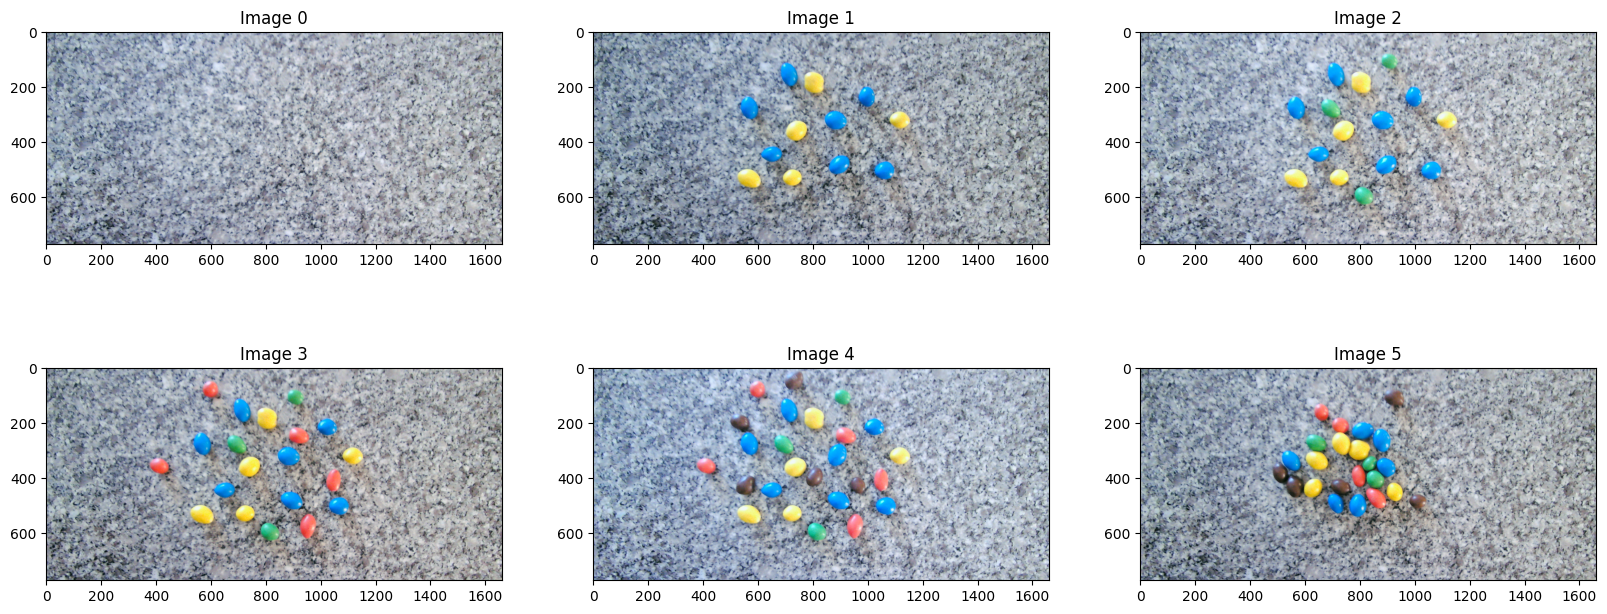

In [33]:
grey_und_0, grey_rgb_0 = undist_images(img_path='GreyBackground/calib_img 0.png')
grey_und_1, grey_rgb_1 = undist_images(img_path='GreyBackground/calib_img 1.png')
grey_und_2, grey_rgb_2 = undist_images(img_path='GreyBackground/calib_img 2.png')
grey_und_3, grey_rgb_3 = undist_images(img_path='GreyBackground/calib_img 3.png')
grey_und_4, grey_rgb_4 = undist_images(img_path='GreyBackground/calib_img 4.png')
grey_und_5, grey_rgb_5 = undist_images(img_path='GreyBackground/calib_img 5.png')

plt.figure(figsize=(20, 8))

# First Row
plot(grey_rgb_0, 231, 'Image 0')
plot(grey_rgb_1, 232, 'Image 1')
plot(grey_rgb_2, 233, 'Image 2')

# Second Row
plot(grey_rgb_3, 234, 'Image 3')
plot(grey_rgb_4, 235, 'Image 4')
plot(grey_rgb_5, 236, 'Image 5')

## I - Calculate the number of M&M per color for all the images provided

In [34]:
colors_dict = {
    'lower_blue':np.array([0, 150, 0]),
    'upper_blue':np.array([30, 255, 255]),

    'lower_green':np.array([40, 90, 50]),
    'upper_green':np.array([80, 255, 255]),

    'lower_yellow':np.array([80, 0, 200]),
    'upper_yellow':np.array([100, 255, 255]),

    'lower_red_1':np.array([110, 100, 50]),
    'upper_red_1':np.array([140, 255, 255]),

    'lower_brown_1':np.array([90, 0, 0]),
    'upper_brown_1':np.array([255, 255, 133]),

}

In [35]:
def count_colors(img, color):
    kernel_5x5 = np.ones((5,5), np.float32) / 25.0
    kernel_erode = np.ones((11, 11), 'uint8')
    kernel_dilate = np.ones((3, 3), 'uint8')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgHSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    #imgHSV = cv.GaussianBlur(imgHSV, (11, 11), 0)
    #blur = cv.blur(imgHSV,(5,5))
    #blur = cv.filter2D(src=imgHSV, ddepth=-1, kernel=kernel_5x5)
    # create a mask if mm is yellow
    if color == 'yellow':
        color = cv.inRange(imgHSV, colors_dict['lower_yellow'], colors_dict['upper_yellow'])
    elif color == 'blue':
        color = cv.inRange(imgHSV, colors_dict['lower_blue'], colors_dict['upper_blue'])
    elif color =='green':
        color = cv.inRange(imgHSV, colors_dict['lower_green'], colors_dict['upper_green'])
    elif color == 'red':
        color = cv.inRange(imgHSV, colors_dict['lower_red_1'], colors_dict['upper_red_1'])
    elif color == 'brown':
        color = cv.inRange(imgHSV, colors_dict['lower_brown_1'], colors_dict['upper_brown_1'])
    eroded = cv.erode(color, kernel_erode, iterations=1)
    dilate = cv.dilate(eroded, kernel_dilate, iterations=2)
    contours, _ = cv.findContours(dilate, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    #result = cv.bitwise_and(img, img, mask=dilate)
    areas = []
    for cnt in contours:
        area_ = cv.contourArea(cnt)
        areas.append(area_)
        #print(area_)
        #ellipse = cv.fitEllipse(cnt)
        #cv.ellipse(img, ellipse, (0, 255, 0), 5)
        img = cv.drawContours(img, cnt, -1, (0, 255, 0), 5)
        #print(area_)
    #plt.imshow(img)
    return areas

def colors_num(img, img_name):
    # segmentation by color
    yellow = count_colors(img, 'yellow')
    green = count_colors(img, 'green')
    blue = count_colors(img, 'blue')
    red = count_colors(img, 'red')
    brown = count_colors(img, 'brown')
    # print the results for each color
    # yellow
    print('='*30)
    print(f'\t{img_name}')
    print('='*30)
    if len(yellow) == 0:
        print('\nThere are not yellow peanuts')
    else:
        print(f'\nThere are {len(yellow)} yellow peanuts')
    # green
    if len(green) == 0:
        print('There are not green peanuts')
    else:
        print(f'There are {len(green)} green peanuts')
    # blue
    if len(blue) == 0:
        print('There are not blue peanuts')
    else:
        print(f'There are {len(blue)} blue peanuts')
    # red
    if len(red) == 0:
        print('There are not red peanuts')
    else:
        print(f'There are {len(red)} red peanuts')
    # brown
    if len(brown) == 0:
        print('There are not brown peanuts\n')
    else:
        print(f'There are {len(brown)} brown peanuts\n')

    return yellow, green, blue, red, brown

In [36]:
yellow_g_1, green_g_1, blue_g_1, red_g_1, brown_g_1 = colors_num(grey_und_1, 'Image 1')
yellow_g_2, green_g_2, blue_g_2, red_g_2, brown_g_2 = colors_num(grey_und_2, 'Image 2')
yellow_g_3, green_g_3, blue_g_3, red_g_3, brown_g_3 = colors_num(grey_und_3, 'Image 3')
yellow_g_4, green_g_4, blue_g_4, red_g_4, brown_g_4 = colors_num(grey_und_4, 'Image 4')
yellow_g_5, green_g_5, blue_g_5, red_g_5, brown_g_5 = colors_num(grey_und_5, 'Image 5')

	Image 1

There are 5 yellow peanuts
There are not green peanuts
There are 7 blue peanuts
There are not red peanuts
There are not brown peanuts

	Image 2

There are 5 yellow peanuts
There are 3 green peanuts
There are 7 blue peanuts
There are not red peanuts
There are not brown peanuts

	Image 3

There are 5 yellow peanuts
There are 3 green peanuts
There are 7 blue peanuts
There are 5 red peanuts
There are 4 brown peanuts

	Image 4

There are 5 yellow peanuts
There are 5 green peanuts
There are 7 blue peanuts
There are 5 red peanuts
There are 7 brown peanuts

	Image 5

There are 5 yellow peanuts
There are 3 green peanuts
There are 6 blue peanuts
There are 4 red peanuts
There are 5 brown peanuts



## II - Determine the average area for peanuts in pixels

### i - Show all the peanuts that were detected

In [37]:
def detect_area(img, img_num):
    kernel_5x5 = np.ones((5,5), np.float32) / 25.0
    kernel_erode = np.ones((11, 11), 'uint8')
    kernel_dilate = np.ones((3, 3), 'uint8')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgHSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    color1 = cv.inRange(imgHSV, colors_dict['lower_yellow'], colors_dict['upper_yellow'])
    color2 = cv.inRange(imgHSV, colors_dict['lower_blue'], colors_dict['upper_blue'])
    color3 = cv.inRange(imgHSV, colors_dict['lower_green'], colors_dict['upper_green'])
    color4 = cv.inRange(imgHSV, colors_dict['lower_red_1'], colors_dict['upper_red_1'])
    mask = color1 + color2 + color3 + color4
    eroded = cv.erode(mask, kernel_erode, iterations=1)
    dilate = cv.dilate(eroded, kernel_dilate, iterations=2)
    contours, _ = cv.findContours(dilate, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    areas = []
    for cnt in contours:
        area_ = cv.contourArea(cnt)
        areas.append(area_)
        #print(area_)
        #ellipse = cv.fitEllipse(cnt)
        #cv.ellipse(img, ellipse, (0, 255, 0), 5)
        img = cv.drawContours(img, cnt, -1, (0, 255, 0), 5)
        #print(area_)
    #plt.imshow(img)
    print(f"The average M&M's area of image {img_num}, in pixels, is: {round(np.mean(areas),2)}")
    return img

The average M&M's area of image 1, in pixels, is: 2549.08
The average M&M's area of image 2, in pixels, is: 2159.8
The average M&M's area of image 3, in pixels, is: 2146.78


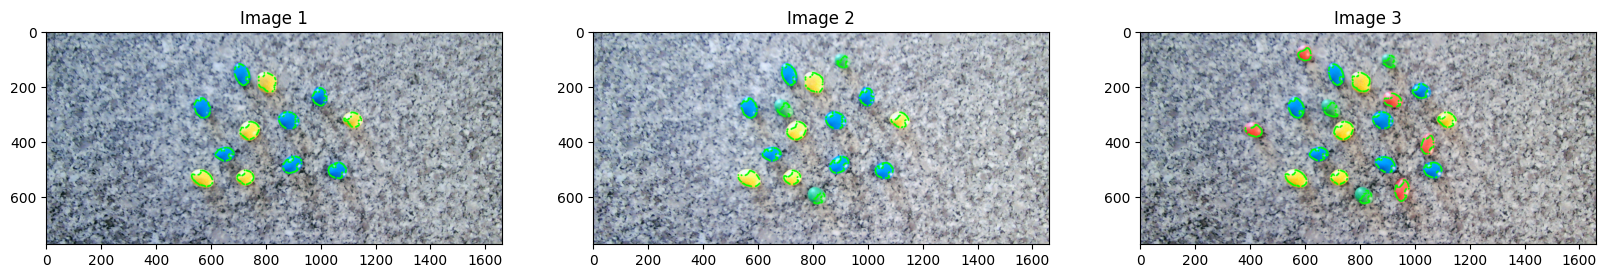

In [38]:
area_g_1 = detect_area(grey_und_1,1)
area_g_2 = detect_area(grey_und_2,2)
area_g_3 = detect_area(grey_und_3,3)

plt.figure(figsize=(20,20))
plot(area_g_1, 131, 'Image 1')
plot(area_g_2, 132, 'Image 2')
plot(area_g_3, 133, 'Image 3')

## III - Determine the average area (and standard deviation) for peanuts in millimiters and grouped by color

In [39]:
def count_colors(img, color):
    kernel_5x5 = np.ones((5,5), np.float32) / 25.0
    kernel_erode = np.ones((11, 11), 'uint8')
    kernel_dilate = np.ones((3, 3), 'uint8')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgHSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    #imgHSV = cv.GaussianBlur(imgHSV, (11, 11), 0)
    #blur = cv.blur(imgHSV,(5,5))
    #blur = cv.filter2D(src=imgHSV, ddepth=-1, kernel=kernel_5x5)
    # create a mask if mm is yellow
    if color == 'yellow':
        color = cv.inRange(imgHSV, colors_dict['lower_yellow'], colors_dict['upper_yellow'])
    elif color == 'blue':
        color = cv.inRange(imgHSV, colors_dict['lower_blue'], colors_dict['upper_blue'])
    elif color =='green':
        color = cv.inRange(imgHSV, colors_dict['lower_green'], colors_dict['upper_green'])
    elif color == 'red':
        color = cv.inRange(imgHSV, colors_dict['lower_red_1'], colors_dict['upper_red_1'])
    elif color == 'brown':
        color = cv.inRange(imgHSV, colors_dict['lower_brown_1'], colors_dict['upper_brown_1'])
    eroded = cv.erode(color, kernel_erode, iterations=1)
    dilate = cv.dilate(eroded, kernel_dilate, iterations=2)
    contours, _ = cv.findContours(dilate, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    #result = cv.bitwise_and(img, img, mask=dilate)
    areas = []
    for cnt in contours:
        area_ = cv.contourArea(cnt)
        areas.append(area_*(mm_ratio**2))
        #print(area_)
        #ellipse = cv.fitEllipse(cnt)
        #cv.ellipse(img, ellipse, (0, 255, 0), 5)
        img = cv.drawContours(img, cnt, -1, (0, 255, 0), 5)
        #print(area_)
    #plt.imshow(img)
    return areas

In [40]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
def color_area(img):
    yellow = count_colors(img, 'yellow')
    green = count_colors(img, 'green')
    blue = count_colors(img, 'blue')
    red = count_colors(img, 'red')

    return yellow, green, blue, red


yellow_c_2, green_c_2, blue_c_2, red_c_2 = color_area(grey_und_2)
yellow_c_3, green_c_3, blue_c_3, red_c_3 = color_area(grey_und_3)

def compute_area_mm(yellow_c_2, green_c_2, blue_c_2, red_c_2,yellow_c_3, green_c_3, blue_c_3, red_c_3):
    results_dict={
        'Image':[2,3],
        # yellow
        "Avg yellow M&M's area":[np.round(np.mean(yellow_c_2),2),
                                    np.round(np.mean([yellow_c_3]),2)],
        'Yellow Std':[np.round(np.std(yellow_c_2),2), np.round(np.std(yellow_c_3),2)],
        # green
        "Avg green M&M's area":[np.round(np.mean(green_c_2),2),
                                    np.round(np.mean(green_c_3),2)],
        'Green Std':[np.round(np.std(green_c_2),2), np.round(np.std(green_c_3),2)],
        # blue
        "Avg blue M&M's area":[np.round(np.mean(blue_c_2),2),
                                np.round(np.mean(blue_c_3),2)],
        'Blue Std':[np.round(np.std(blue_c_2),2), np.round(np.std(blue_c_3),2)],
        # red
        "Avg red M&M's area":[np.round(np.mean(red_c_2),2),
                                np.round(np.mean(red_c_3),2)],
        'Red Std':[np.round(np.std(red_c_2),2), np.round(np.std(red_c_3),2)]
    }

    results_df = pd.DataFrame(results_dict)
    results_df.set_index('Image', inplace=True)

    return results_df

### i - Show the result in a table color vs area and standard deviation

In [41]:
results_df_grey = compute_area_mm(yellow_c_2, green_c_2, blue_c_2, red_c_2,yellow_c_3, green_c_3, blue_c_3, red_c_3)

In [42]:
results_df_grey

Avg yellow M&M's area  Yellow Std  Avg green M&M's area  Green Std  \
Image                                                                       
2                     170.98       42.50                  65.4      13.52   
3                     177.85       34.95                  79.9      17.05   

       Avg blue M&M's area  Blue Std  Avg red M&M's area  Red Std  
Image                                                              
2                   161.98     22.27                 NaN      NaN  
3                   162.71     24.43              125.57    16.26

### ii - Discuss the limitation of the method implemented


- One limitation pertains to certain colors, such as brown, where the area measurement can be highly imprecise due to the influence of the background color. Furthermore, in the case of calib_img 5.png, two closely positioned M&M's are sometimes incorrectly recognized as a single one.

- When peanuts are subjected to uneven lighting conditions, the presence of bright spots and shadows can have an impact on contour detection. Additionally, when a peanut has a relatively small size in pixels, its specular component might dominate a significant portion of its area, thereby affecting color detection accuracy.

- The gray background is also a limitation, because it causes mistakes in the algorithm. So, a white background would be better for the purpose.